# NBA Analysis

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [168]:
df = pd.read_csv('nba_2013.csv')
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [169]:
df.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [171]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


#### EDA

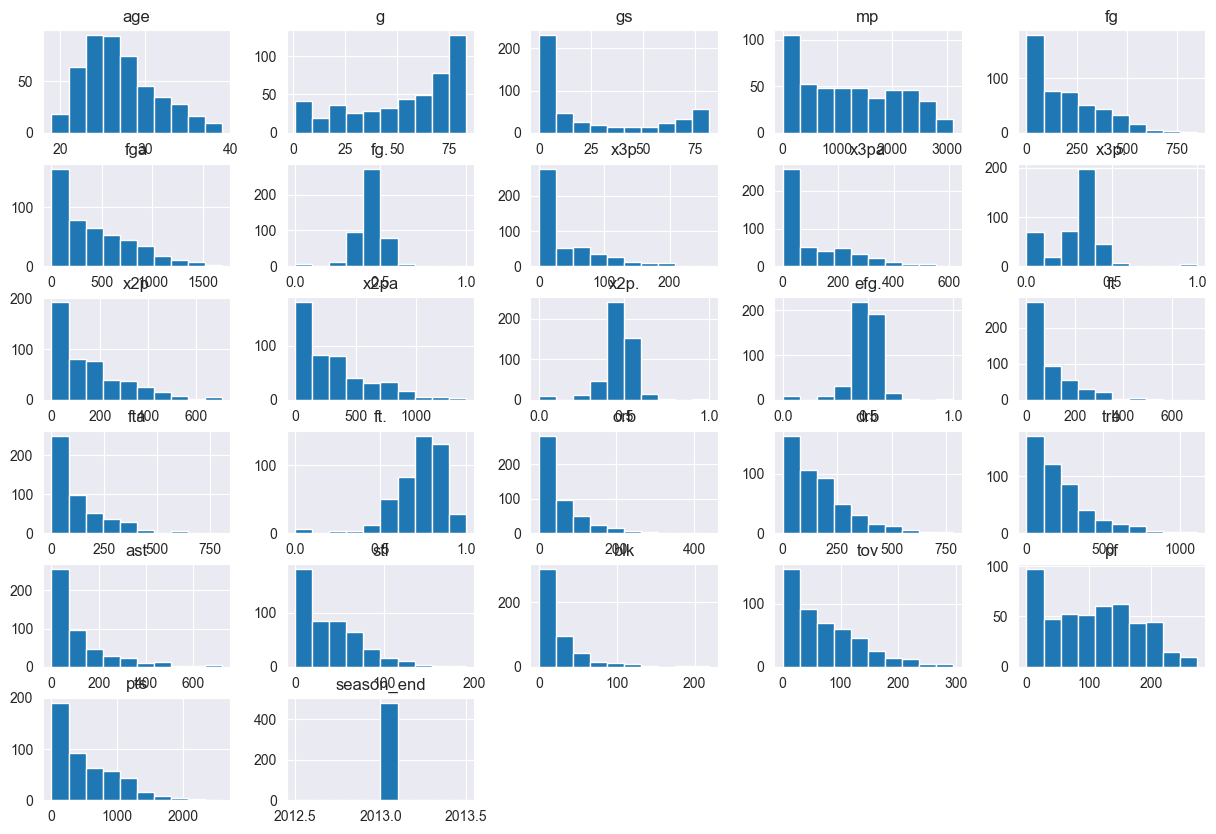

In [172]:
df.hist(figsize=(15,10))
plt.show()

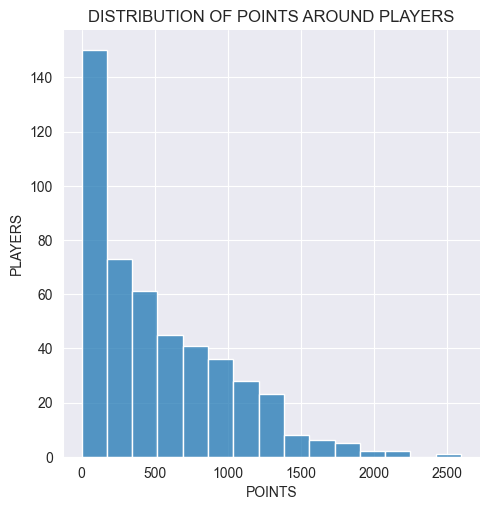

In [173]:
sns.displot(df['pts'])
plt.title("DISTRIBUTION OF POINTS AROUND PLAYERS")
plt.xlabel("POINTS")
plt.ylabel("PLAYERS")
plt.show()

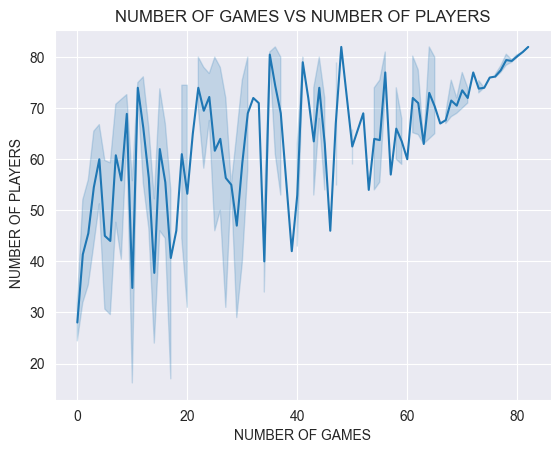

<Figure size 1500x500 with 0 Axes>

In [174]:
sns.lineplot(y="g",x="gs",data=df)
plt.title("NUMBER OF GAMES VS NUMBER OF PLAYERS")
plt.xlabel("NUMBER OF GAMES")
plt.ylabel(" NUMBER OF PLAYERS")
plt.figure(figsize=(15,5))
plt.show()

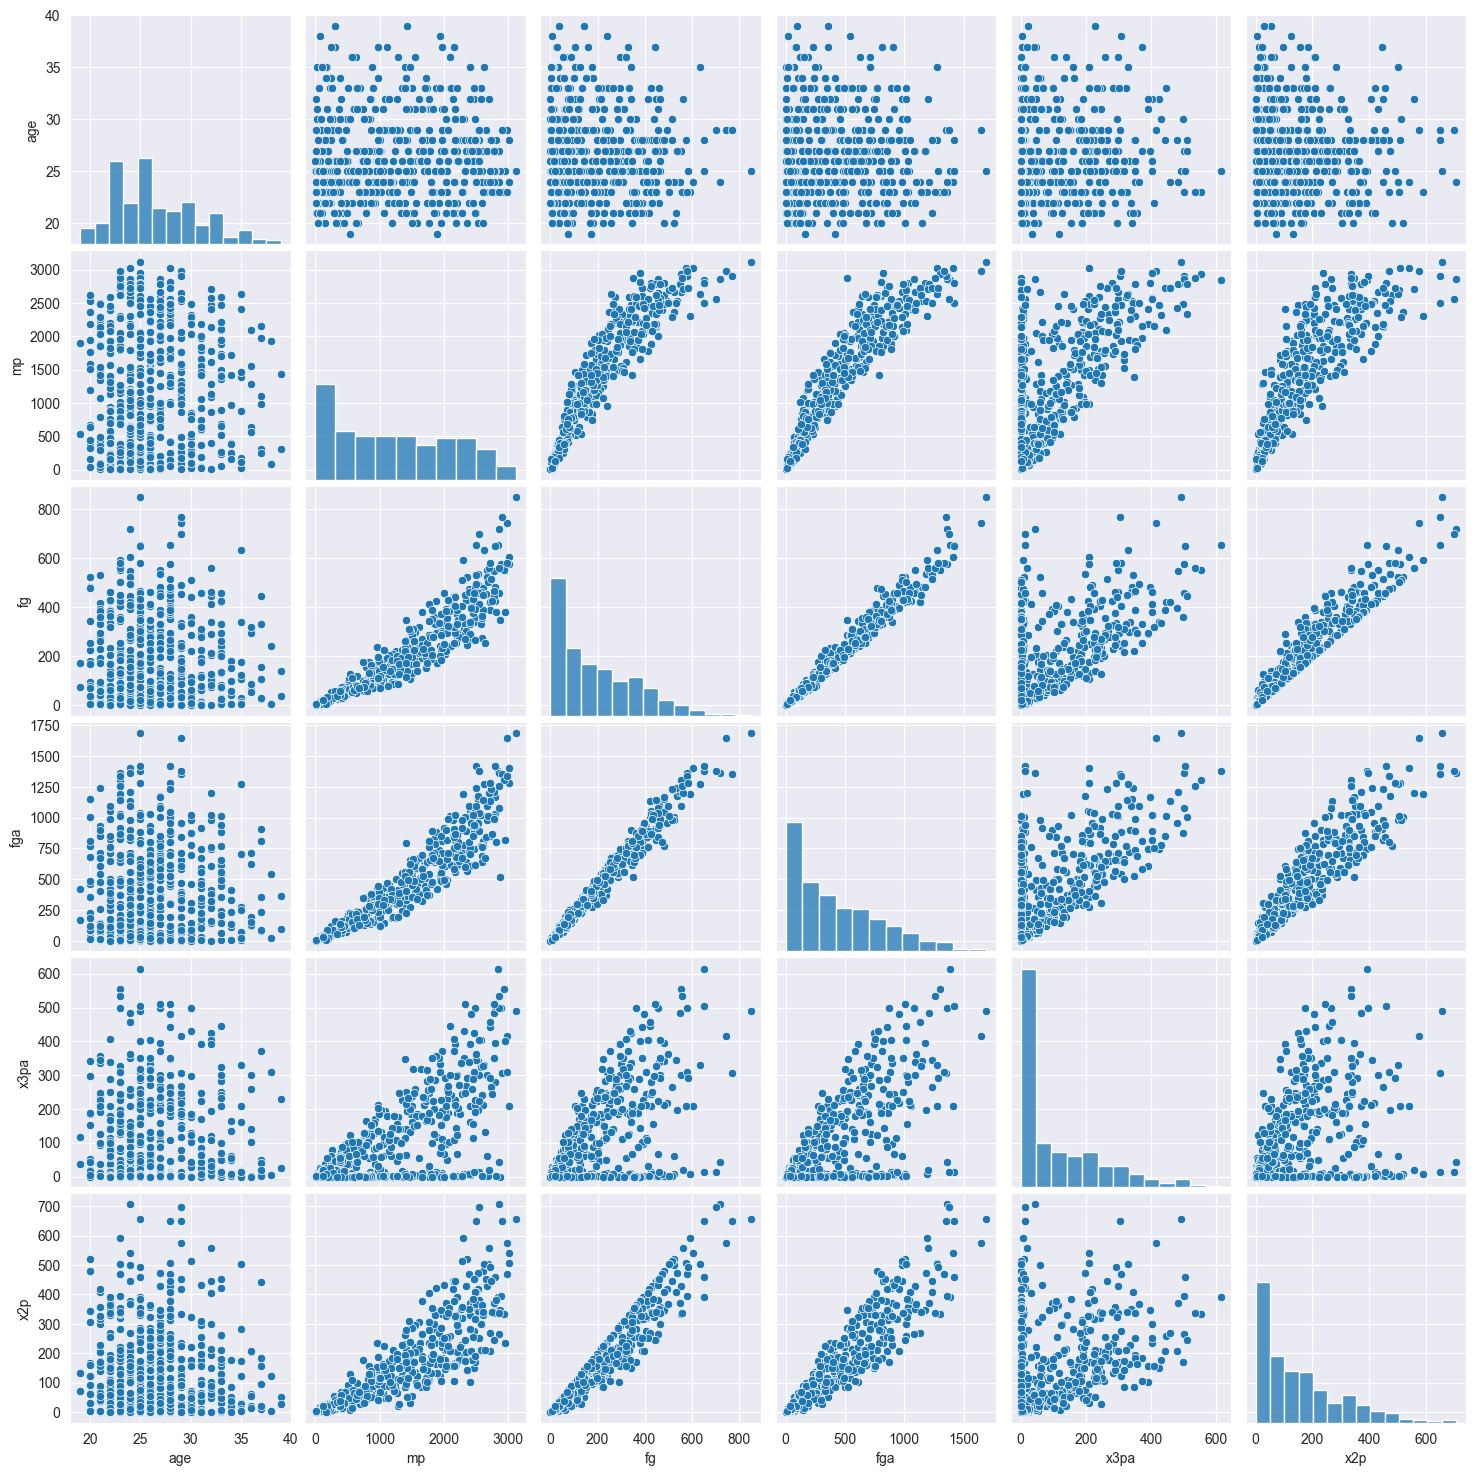

In [175]:
worst_col = ['age','mp','fg','fga','x3pa','x2p']

sns.pairplot(df[worst_col],palette='Accent')

#### Data Preprocessing

In [176]:
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [177]:
df=df.drop(['fg.','x3p.','ft.'],axis=1)
df=df.dropna()

In [178]:
df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
x3p             0
x3pa            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [179]:
df.corr(numeric_only=True)

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.003197,0.029405,0.014369,-0.004529,-0.013010,0.054379,0.032803,-0.024098,-0.031129,...,-0.064850,0.016132,-0.008422,0.023306,-0.023283,-0.013776,-0.025635,-0.021521,-0.006846,NaN
g,-0.003197,1.000000,0.609110,0.863214,0.738038,0.744917,0.515884,0.534548,0.682473,0.691921,...,0.543790,0.704984,0.680082,0.548567,0.707253,0.472589,0.710988,0.863971,0.726519,NaN
gs,0.029405,0.609110,1.000000,0.859656,0.820702,0.810561,0.499767,0.513573,0.784482,0.783664,...,0.557915,0.773681,0.734292,0.634382,0.741768,0.503497,0.765846,0.724227,0.809300,NaN
mp,0.014369,0.863214,0.859656,1.000000,0.930623,0.936389,0.643467,0.664407,0.862992,0.873179,...,0.573966,0.819605,0.772582,0.731701,0.851083,0.503481,0.884421,0.883066,0.926987,NaN
fg,-0.004529,0.738038,0.820702,0.930623,1.000000,0.988169,0.595322,0.611945,0.960582,0.961779,...,0.559597,0.818852,0.767577,0.706649,0.784921,0.481538,0.902607,0.796990,0.991982,NaN
fga,-0.013010,0.744917,0.810561,0.936389,0.988169,1.000000,0.660458,0.683918,0.924245,0.944077,...,0.483906,0.769992,0.708651,0.746809,0.801707,0.409590,0.909953,0.784541,0.989136,NaN
x3p,0.054379,0.515884,0.499767,0.643467,0.595322,0.660458,1.000000,0.991677,0.348490,0.379480,...,-0.070421,0.276453,0.178665,0.616017,0.590149,-0.047613,0.558376,0.443513,0.653766,NaN
x3pa,0.032803,0.534548,0.513573,0.664407,0.611945,0.683918,0.991677,1.000000,0.370762,0.405117,...,-0.062970,0.287879,0.189264,0.641659,0.620990,-0.045167,0.587592,0.460013,0.670396,NaN
x2p,-0.024098,0.682473,0.784482,0.862992,0.960582,0.924245,0.348490,0.370762,1.000000,0.990674,...,0.677166,0.859587,0.833606,0.611212,0.711470,0.578214,0.859751,0.776284,0.931008,NaN
x2pa,-0.031129,0.691921,0.783664,0.873179,0.961779,0.944077,0.379480,0.405117,0.990674,1.000000,...,0.634878,0.834827,0.802525,0.645883,0.724022,0.533701,0.874766,0.775264,0.936573,NaN


In [180]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['player'] = le.fit_transform(df['player'])

In [181]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,x3p,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,367,SF,23,TOT,63,0,847,66,141,4,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,428,C,20,OKC,81,20,1197,93,185,0,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,211,PF,27,TOT,53,12,961,143,275,0,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,39,SG,28,ORL,73,73,2552,464,1011,128,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,12,C,25,NOP,56,30,951,136,249,0,...,183,277,40,23,46,63,187,328,2013-2014,2013


#### Models

In [182]:
from sklearn.model_selection import cross_val_score,  StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [184]:
models = { 'LogisticRegression': LogisticRegression(random_state=42), 'RandomForestClassifier': RandomForestClassifier(random_state=42), 'KNeighborsClassifier': KNeighborsClassifier(), 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42), 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42), 'BaggingClassifier': BaggingClassifier(random_state=42), 'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42), }

In [185]:
df = df.drop(['bref_team_id','season'], axis=1)

In [186]:
y=df['pos']
x=df.drop('pos',axis=1)

In [187]:
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
    model_scores[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

LogisticRegression: 0.5692 (+/- 0.1150)
RandomForestClassifier: 0.5044 (+/- 0.0923)
KNeighborsClassifier: 0.4310 (+/- 0.0700)
DecisionTreeClassifier: 0.4623 (+/- 0.0602)
GradientBoostingClassifier: 0.5148 (+/- 0.0458)
BaggingClassifier: 0.4771 (+/- 0.0755)
ExtraTreesClassifier: 0.5252 (+/- 0.1219)


##### Check the thing you don't want

In [189]:
cols_with_cle = df.columns[df.astype(str).apply(lambda s: s.str.contains('CLE', na=False)).any()]
print(cols_with_cle)

Index(['bref_team_id'], dtype='object')
